In this notebook, we show how to implement various loss functions using PyTorch. Refer to section 9.1 for more details around the theory.

In [1]:
import torch

# Regression Loss

In [2]:
from torch.nn.functional import mse_loss

y = torch.tensor([-0.10, -0.24,  1.43, -0.14, -0.59])
y_gt = torch.tensor([0.59, -1.92, -1.27, -0.40,  0.50])

loss = mse_loss(y, y_gt, reduction='sum')
print('Loss = {}'.format(loss))

Loss = 11.844199180603027


## Cross Entropy Loss

In [3]:
import torch

y = torch.tensor([0.8, 0.15, 0.04, 0.01])
y_gt = torch.tensor([1., 0., 0., 0.])

loss = -1 * torch.dot(y_gt, torch.log(y))

print("Loss = {}".format(loss))

Loss = 0.2231435328722


## Binary Cross Entropy Loss

In [4]:
from torch.nn.functional import binary_cross_entropy
# It is sufficient to just take y0 because y1 = 1 - y0 in the 2 class example
y = torch.tensor([0.8])
y_gt = torch.tensor([1.])
loss = binary_cross_entropy(y, y_gt)
print("Loss = {}".format(loss))

Loss = 0.2231435328722


## Softmax

In [5]:
from torch.nn.functional import softmax
logits = torch.tensor([9.99, 10, 0.01, -10])
output = softmax(logits, dim=0)

print("Softmax output = {}".format(output))

Softmax output = tensor([4.9749e-01, 5.0249e-01, 2.3042e-05, 1.0357e-09])


## Softmax Cross Entropy

In [6]:
from torch.nn.functional import cross_entropy
logits = torch.tensor([[9.99, 10, 0.01, -10]])
y_gt = torch.tensor([1])
loss = cross_entropy(logits, y_gt)

print("Loss = {}".format(loss))

Loss = 0.6881826519966125


##  Focal Loss

In [7]:
def focal_loss(y, y_gt, gamma):
    y_t = (y_gt * y) + ((1 - y_gt) * (1 - y))
    loss = -1 * torch.pow((1 - y_t), gamma) * torch.log(y_t)
    return loss
    
y = torch.tensor([0.8])
y_gt = torch.tensor([1.])
loss_0 = focal_loss(y, y_gt, 0)
loss_1 = focal_loss(y, y_gt, 1)
loss_2 = focal_loss(y, y_gt, 2)
print("gamma=0, loss = {}".format(loss_0))
print("gamma=1, loss = {}".format(loss_1))
print("gamma=1, loss = {}".format(loss_2))

gamma=0, loss = tensor([0.2231])
gamma=1, loss = tensor([0.0446])
gamma=1, loss = tensor([0.0089])


## Plot Focal Loss

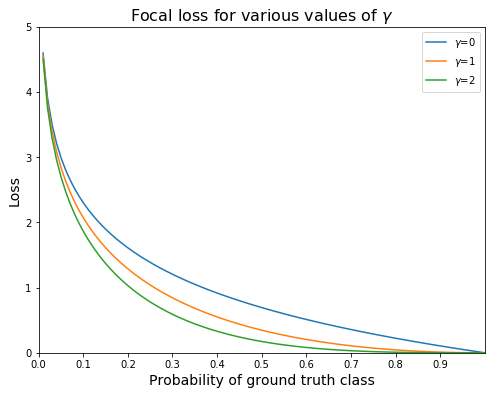

In [9]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

def plot_focal_loss():
    fig = plt.figure(figsize=(8, 6))
    ax = fig.gca()
    x = torch.linspace(start=0, end=1, steps=100)
    y_0 = [focal_loss(torch.tensor([x_el]), torch.tensor([1]), gamma=0) for x_el in x] 
    y_1 = [focal_loss(torch.tensor([x_el]), torch.tensor([1]), gamma=1) for x_el in x] 
    y_2 = [focal_loss(torch.tensor([x_el]), torch.tensor([1]), gamma=2) for x_el in x] 
    ax.plot(x.squeeze(), y_0, label=r"$\gamma$=0")
    ax.plot(x.squeeze(), y_1, label=r"$\gamma$=1")
    ax.plot(x.squeeze(), y_2, label=r"$\gamma$=2")
    ax.set_xlim(0, 1)
    ax.set_xticks(torch.arange(0, 10) / 10.)
    ax.set_ylim(0, 5)
    ax.set_xlabel("Probability of ground truth class", fontsize=14)
    ax.set_ylabel("Loss", fontsize=14)
    plt.title(r"Focal loss for various values of $\gamma$", fontsize=16)
    ax.legend()
    plt.show()
    fig.show()

plot_focal_loss()